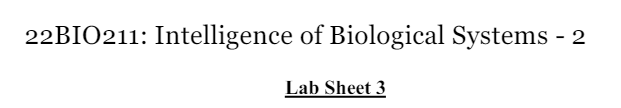

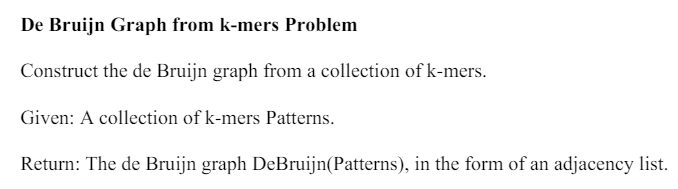

In [6]:
kmers = [
    "GAGG",
    "CAGG",
    "GGGG",
    "GGGA",
    "CAGG",
    "AGGG",
    "GGAG"
]

def DeBruijin(kmers):
  graph = {}
  for i in kmers:
    if i[1:] not in graph:
      graph[i[1:]] = []
    if i[:-1] not in graph:
      graph[i[:-1]] = [i[1:]]
    else:
      graph[i[:-1]].append(i[1:])
  return graph

graph = DeBruijin(kmers)

for i in sorted(graph):
  print(f"{i} -> " + str(graph[i])[1:-1].replace("'", ''))

AGG -> GGG
CAG -> AGG, AGG
GAG -> AGG
GGA -> GAG
GGG -> GGG, GGA


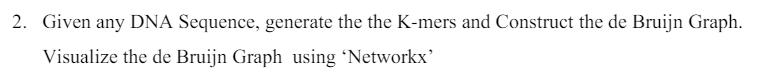

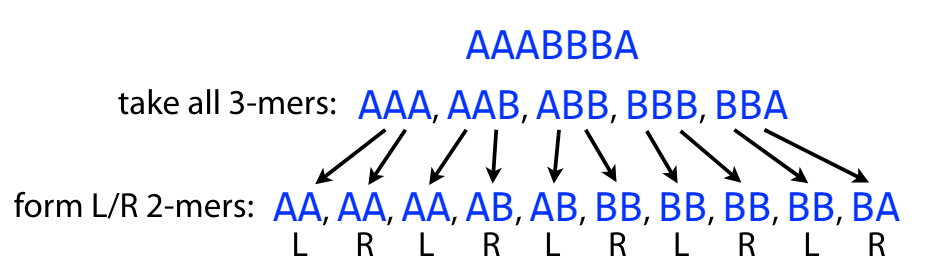

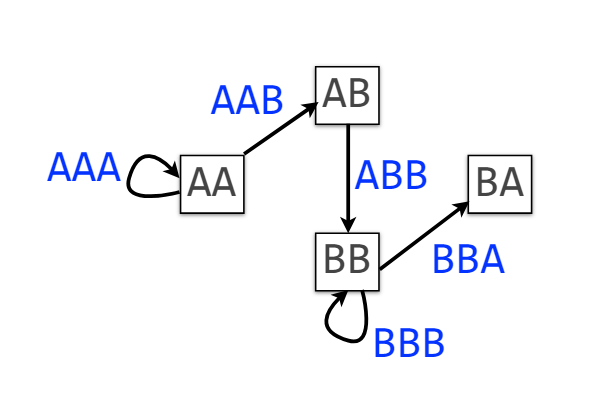

{('AA', 'AA'): Text(-1.0, 0.3712248779548204, 'AAA'),
 ('AA', 'AB'): Text(-0.6335326664651094, 0.39336291482763586, 'AAB'),
 ('AB', 'BB'): Text(0.019234609447680517, 0.2768262978161129, 'ABB'),
 ('BB', 'BB'): Text(0.30554362340061836, 0.13815303641481202, 'BBB'),
 ('BB', 'BA'): Text(0.6335414504010659, -0.39336759933957977, 'BBA')}

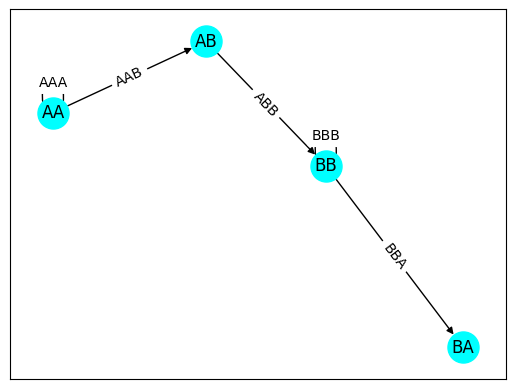

In [29]:
dna = "AAABBBA"

def kmergen(dna, k):
  return [dna[i:i+k] for i in range(len(dna)-k+1)]

kmers = kmergen(dna, 3)

graph = DeBruijin(kmers)

import networkx as nx

G = nx.DiGraph(graph)


labels = dict()
for i in graph:
  for j in graph[i]:
    labels[(i , j)] = i+j[-1]


pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=500, node_color='cyan')

nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=labels,
    font_color='black'
)

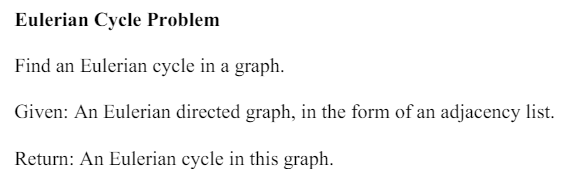

In [20]:
def EulerianCycle(graph, spawn=None):
  from random import choice
  cycle = []
  if spawn is None:
    spawn = choice(list(graph.keys()))
  cycle.append(spawn)
  node = choice(graph[spawn])
  if spawn in graph[spawn]:
    node = spawn
  while graph[node] != []:
    graph[cycle[-1]].remove(node)
    cycle.append(node)
    if node in graph[node]:
      continue
    node = choice(graph[node])
  graph[cycle[-1]].remove(node)
  cycle.append(node)
  for ind, i in enumerate(cycle):
    if graph[i] != []:
      cycle2 = EulerianCycle(graph, spawn=i)
      cycle = cycle[:ind] + cycle2 + cycle[ind+1:]
      return cycle
  return cycle

graph = {
    0: [3],
    1: [0],
    2: [1, 6],
    3: [2],
    4: [2],
    5: [4],
    6: [5, 8],
    7: [9],
    8: [7],
    9: [6]
}
cycle = EulerianCycle(graph, spawn=6)
print(cycle)

[6, 8, 7, 9, 6, 5, 4, 2, 1, 0, 3, 2, 6]


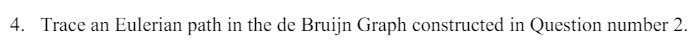

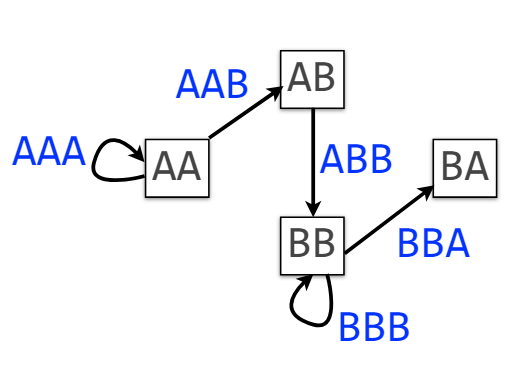

In [28]:
def Eulerian(graph):
  degree = {i:len(graph[i]) for i in graph}
  for i in graph:
    for j in graph[i]:
      degree[j] -=1

  l = list(degree.values())
  if len(l) - l.count(0) > 2:
    print("No Eulerian Path Exists")
    return
  elif len(l) - l.count(0) == 0:
    return EulerianCycle(graph)
  else:
    for i in degree:
      if degree[i]>0:
        spawn = i
        break
  return EulerianCycle(graph, spawn)

dna = "AAABBBA"

def kmergen(dna, k):
  return [dna[i:i+k] for i in range(len(dna)-k+1)]

kmers = kmergen(dna, 3)

graph = DeBruijin(kmers)

# graph = {
#     0 : [1, 5],
#     1 : [2, 4],
#     2 : [3],
#     3 : [1, 0],
#     4 : [3],
#     5 : [4]
# }


path = Eulerian(graph)
print(path)

['AA', 'AA', 'AB', 'BB', 'BB', 'BA']
